In [18]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

titanic=pd.read_excel("titanic.xls")
titanic.head()
titanic.drop(['boat','body','home.dest'],axis=1,inplace=True)
titanic.dropna(axis=0,inplace=True)

print(titanic.shape)
x=titanic[["pclass","age","parch","fare","embarked"]]
y=titanic["sex"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7)

                                        ##encodage##
## labelencoder,ordinalencoder : encoder chaque classe de la variable cible par une valeur numerique 
#labelencoder :encoder la variable cible(seule colonne)
#incovient 0<1<2
encoder=LabelEncoder()
encoder.fit(y)
encoder.transform(y)
print(encoder.fit_transform(y))
encoder.inverse_transform(np.array([0,1])) ## encodage inverse 

#ordinalenocder:encoder la variable x(data)(plusieures colonne)
encoder_2=OrdinalEncoder()
print(encoder_2.fit_transform(x))

##encodage onehot(creer autant de colonne qu'on a de categorie en BINAIRE )
##troix type(LabelBinarizer,MultilabelBinazier,oneHotEncoder)
encoder_3=LabelBinarizer()
print(encoder_3.fit_transform(y))

encoder_4=MultiLabelBinarizer()
encoder_4.fit_transform(y)


encoder_5=OneHotEncoder()
##ca permet d'avoir une matrice creus(sparse matrix) qu'on ecrit sous form de 3 tableaux 
# tab1=value(1) ,tab2=emplacement_row , tab3=emplacement_col =>format(CSR , matrice compresse )
print(encoder_5.fit_transform(x))

  


    


(270, 11)
[0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 1 0 0 0 1 0 0]
[[ 0. 26.  0. 98.  2.]
 [ 0.  0.  2. 95.  2.]
 [ 0.  2.  2. 95.  2.]
 ...
 [ 2. 15.  0.  3.  2.]
 [ 2.  2.  1.  5.  2.]
 [ 2. 26.  1.  5.  2.]]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [

Text(0.5, 1.0, 'Robuste scaler')

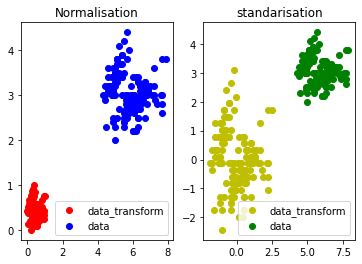

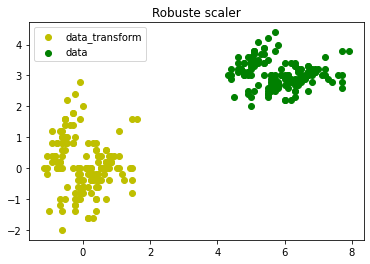

In [17]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
from sklearn.preprocessing  import *
from sklearn.datasets import load_iris

iris=load_iris()
y1=iris.target
x1=iris.data

#normalisation 
scaler=MinMaxScaler() #(x-xmin/xmax-xmin)
x_transform=scaler.fit_transform(x1)


fig1=plt.figure()
fig1.add_subplot(1,2,1)
plt.scatter(x_transform[:,0],x_transform[:,1],c='r',label="data_transform")
plt.scatter(x1[:,0],x1[:,1],c='b',label="data")
plt.legend()
plt.title("Normalisation")

#standarisation 
scaler2=StandardScaler() #(x-moyen/ecart-type)
x_transform_2=scaler2.fit_transform(x1)
fig1.add_subplot(1,2,2)
plt.scatter(x_transform_2[:,0],x_transform_2[:,1],c='y',label="data_transform")
plt.scatter(x1[:,0],x1[:,1],c='g',label="data")
plt.legend()
plt.title("standarisation")

##ces deux techniques sonts sensibles au donnees aberantes pour cela on utilise un troixieme 
#transformer robustescaler 
scaler3=RobustScaler()  #(x-median/Q3-Q1) Q3-Q1=interquartile 
x_transform_3=scaler3.fit_transform(x1) 
fig2=plt.figure()
plt.scatter(x_transform_3[:,0],x_transform_3[:,1],c='y',label="data_transform")
plt.scatter(x1[:,0],x1[:,1],c='g',label="data")
plt.legend()
plt.title("Robuste scaler")



(10, 6)
(10, 6)
[[ 1.00000000e+00  5.33035907e-01  7.47727849e-01  3.28647979e-01
   3.49095489e-01  4.31470360e-01]
 [ 1.00000000e+00  4.14270252e-01 -2.00369518e-02  6.41422821e-01
   6.39955568e-01  6.71650480e-01]
 [ 1.00000000e+00 -2.63580360e-01 -7.56910549e-01  7.59228959e-01
   7.04153859e-01  6.75891906e-01]
 [ 1.00000000e+00 -1.50051593e+00 -1.46289294e+00  6.82066391e-01
   5.41690364e-01  4.44194638e-01]
 [ 1.00000000e+00 -3.29653645e+00 -2.13798413e+00  4.09935118e-01
   1.52565081e-01 -2.34413233e-02]
 [ 1.00000000e+00 -5.65164194e+00 -2.78218412e+00 -5.71648601e-02
  -4.63221988e-01 -7.27015979e-01]
 [ 1.00000000e+00 -8.56583238e+00 -3.39549290e+00 -7.19233544e-01
  -1.30567084e+00 -1.66652933e+00]
 [ 1.00000000e+00 -1.20391078e+01 -3.97791048e+00 -1.57627093e+00
  -2.37478149e+00 -2.84198137e+00]
 [ 1.00000000e+00 -1.60714681e+01 -4.52943686e+00 -2.62827703e+00
  -3.67055392e+00 -4.25337211e+00]
 [ 1.00000000e+00 -2.06629134e+01 -5.05007203e+00 -3.87525183e+00
  -5.1929

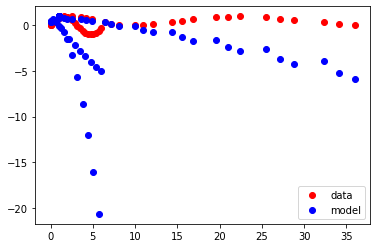

In [30]:
##polyfeatures## ca permet de creer des variables ploynimiales a partire des variables existant
from sklearn.linear_model import *
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures


x=np.linspace(0,6,20).reshape(10,2)
y=np.sin(x)
xtest=np.arange(20).reshape(10,2)
ytest=xtest**2+np.random.randint(20)
#ytest=np.array([4,15,13,17,56,80,90,100])

x_poly=PolynomialFeatures(2).fit_transform(x)
y_poly=PolynomialFeatures(2).fit_transform(y)
x_test=PolynomialFeatures(2).fit_transform(xtest)
y_test=PolynomialFeatures(2).fit_transform(ytest)
print(y_poly.shape)
print(x_poly.shape)
modele2=LinearRegression()
modele2.fit(x_poly,y_poly)
ypred=modele2.predict(x_test)
print(ypred)
print("score",modele2.score(x_test,y_test))



fig1=plt.figure()
plt.scatter(x_poly,y_poly,c='r',label='data')
plt.scatter(x_poly,ypred,c='b',label='model')
plt.legend()



